In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the CSV file
file_path_csv = '/content/changed_data_visualisationv2.csv'
df = pd.read_csv(file_path_csv)

# Display the first few rows of the data
df.head()

,Unnamed: 0,Unnamed: 1,Domestic consumers,Unnamed: 3,Commercial and industrial consumers,Unnamed: 5,All consumers,Unnamed: 7
0,NUTS4 Code,NUTS4 Area and Government Office Region,Sales 2004 - GWh-Domestic,Number of MPANs (thousands)-Domestic,Sales 2004 - GWh-Commercial and industrial,Number of MPANs (thousands)-Commercial and ind...,Sales 2004 - GWh_Total,Number of MPANs (thousands)_Total
1,UKL1605,Blaenau Gwent,108,30.9,172,2.3,280,33.2
2,UKL1705,Bridgend,226,58.1,484,4.5,710,62.6
3,UKL1604,Caerphilly,274,73.4,435,5.0,709,78.5
4,UKL2207,Cardiff,546,137.4,"1,056",11.5,"1,603",148.9


In [6]:
# Create a new header from the first row
new_header = df.iloc[0]
# Set the header row as the df header
df.columns = new_header
# Drop the first row to avoid repetition
df = df[1:]
df.head()

,NUTS4 Code,NUTS4 Area and Government Office Region,Sales 2004 - GWh-Domestic,Number of MPANs (thousands)-Domestic,Sales 2004 - GWh-Commercial and industrial,Number of MPANs (thousands)-Commercial and industrial,Sales 2004 - GWh_Total,Number of MPANs (thousands)_Total
1,UKL1605,Blaenau Gwent,108,30.9,172,2.3,280,33.2
2,UKL1705,Bridgend,226,58.1,484,4.5,710,62.6
3,UKL1604,Caerphilly,274,73.4,435,5.0,709,78.5
4,UKL2207,Cardiff,546,137.4,"1,056",11.5,"1,603",148.9
5,UKL1409,Carmarthenshire,332,76.7,642,9.9,974,86.6


In [7]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 1 to 419
Data columns (total 8 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   NUTS4 Code                                              419 non-null    object
 1   NUTS4 Area and Government Office Region                 419 non-null    object
 2    Sales 2004 - GWh-Domestic                              419 non-null    object
 3   Number of MPANs (thousands)-Domestic                    419 non-null    object
 4    Sales 2004 - GWh-Commercial and industrial             419 non-null    object
 5   Number of MPANs (thousands)-Commercial and industrial   419 non-null    object
 6   Sales 2004 - GWh_Total                                  419 non-null    object
 7   Number of MPANs (thousands)_Total                       419 non-null    object
dtypes: object(8)
memory usage: 29.5+ KB


In [8]:
# Rename columns to simplify handling
df.columns = ['NUTS4_Code', 'Region', 'Domestic_Sales_GWh', 'Domestic_MPANs_thousands',
                  'Commercial_Industrial_Sales_GWh', 'Commercial_Industrial_MPANs_thousands',
                  'Total_Sales_GWh', 'Total_MPANs_thousands']

# Convert relevant columns to numeric, handling errors gracefully
numeric_columns_new = ['Domestic_Sales_GWh', 'Domestic_MPANs_thousands',
                       'Commercial_Industrial_Sales_GWh', 'Commercial_Industrial_MPANs_thousands',
                       'Total_Sales_GWh', 'Total_MPANs_thousands']

# for col in numeric_columns_new:
#     df[col] = pd.to_numeric(df[col])
for col in numeric_columns_new:
    df[col] = df[col].replace(',', '', regex=True).astype(float)



# Filter data to only include rows with "Total" in the region name
df_total = df[df['Region'].str.contains('Total', case=False, na=False)]

# Check the cleaned data
df_total.head()


,NUTS4_Code,Region,Domestic_Sales_GWh,Domestic_MPANs_thousands,Commercial_Industrial_Sales_GWh,Commercial_Industrial_MPANs_thousands,Total_Sales_GWh,Total_MPANs_thousands
23,UKL,TOTAL WALES,5602.0,1305.1,10970.0,130.1,16572.0,1435.2
56,UKM,TOTAL SCOTLAND,12317.0,2570.5,17982.0,218.0,30299.0,2788.5
80,UKC,TOTAL NORTH EAST,4578.0,1163.3,8129.0,83.9,12708.0,1247.2
124,UKD,TOTAL NORTH WEST,13316.0,3030.9,20913.0,252.5,34230.0,3283.4
146,UKE,TOTAL YORKSHIRE AND THE HUMBER,9760.0,2252.5,15842.0,185.3,25602.0,2437.8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 1 to 419
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NUTS4_Code                             419 non-null    object 
 1   Region                                 419 non-null    object 
 2   Domestic_Sales_GWh                     419 non-null    float64
 3   Domestic_MPANs_thousands               419 non-null    float64
 4   Commercial_Industrial_Sales_GWh        419 non-null    float64
 5   Commercial_Industrial_MPANs_thousands  419 non-null    float64
 6   Total_Sales_GWh                        419 non-null    float64
 7   Total_MPANs_thousands                  419 non-null    float64
dtypes: float64(6), object(2)
memory usage: 29.5+ KB


In [10]:
df_total = df_total[df_total['Region'] != 'TOTAL YORKSHIRE AND THE HUMBER']

In [11]:
df_total

,NUTS4_Code,Region,Domestic_Sales_GWh,Domestic_MPANs_thousands,Commercial_Industrial_Sales_GWh,Commercial_Industrial_MPANs_thousands,Total_Sales_GWh,Total_MPANs_thousands
23,UKL,TOTAL WALES,5602.0,1305.1,10970.0,130.1,16572.0,1435.2
56,UKM,TOTAL SCOTLAND,12317.0,2570.5,17982.0,218.0,30299.0,2788.5
80,UKC,TOTAL NORTH EAST,4578.0,1163.3,8129.0,83.9,12708.0,1247.2
124,UKD,TOTAL NORTH WEST,13316.0,3030.9,20913.0,252.5,34230.0,3283.4
187,UKF,TOTAL EAST MIDLANDS,8775.0,1890.3,15686.0,161.6,24461.0,2051.9
222,UKG,TOTAL WEST MIDLANDS,10761.0,2297.8,16632.0,205.0,27393.0,2502.8
271,UKH,TOTAL EAST OF ENGLAND,12267.0,2409.7,15884.0,221.2,28150.0,2630.9
373,UKJ,TOTAL SOUTH EAST,17354.0,3519.8,23704.0,346.9,41057.0,3866.8
419,UKK,TOTAL SOUTH WEST,11518.0,2294.7,15189.0,243.9,26707.0,2538.6


<Figure size 1200x800 with 0 Axes>

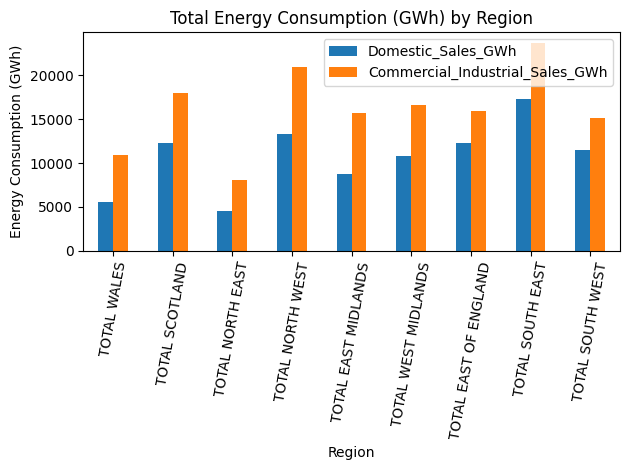

In [12]:
# Plot: Total Energy Consumption (Domestic vs. Commercial/Industrial)
plt.figure(figsize=(12, 8))
df_total.set_index('Region')[['Domestic_Sales_GWh', 'Commercial_Industrial_Sales_GWh']].plot(kind='bar')
plt.title('Total Energy Consumption (GWh) by Region')
plt.xlabel('Region')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

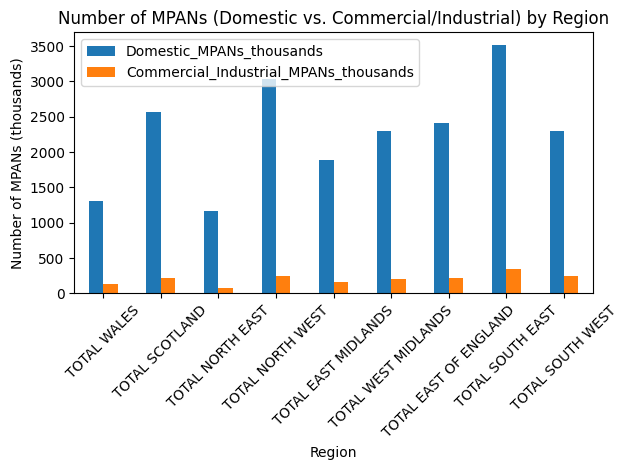

In [13]:
# Plot: Number of MPANs (Domestic vs. Commercial/Industrial)
plt.figure(figsize=(12, 8))
df_total.set_index('Region')[['Domestic_MPANs_thousands', 'Commercial_Industrial_MPANs_thousands']].plot(kind='bar')
plt.title('Number of MPANs (Domestic vs. Commercial/Industrial) by Region')
plt.xlabel('Region')
plt.ylabel('Number of MPANs (thousands)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


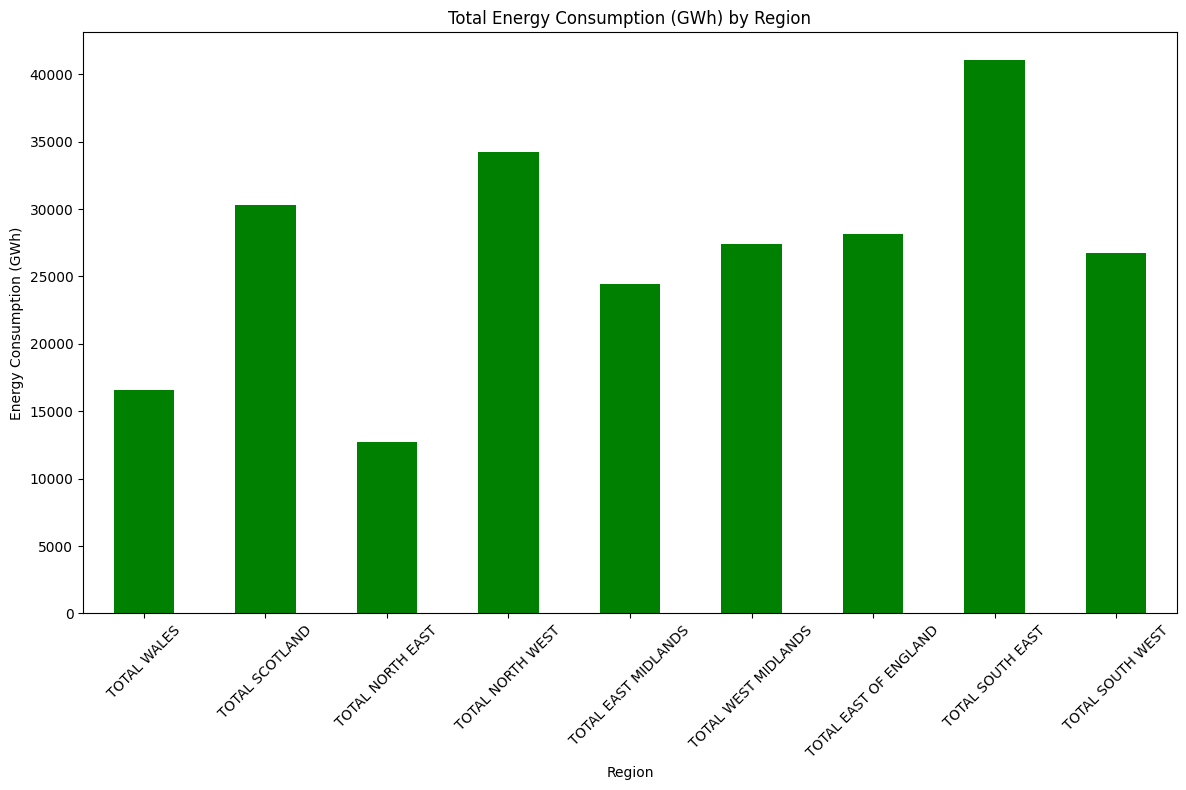

In [14]:
# Plot: Total Energy Consumption by Region
plt.figure(figsize=(12, 8))
df_total.set_index('Region')['Total_Sales_GWh'].plot(kind='bar', color='green')
plt.title('Total Energy Consumption (GWh) by Region')
plt.xlabel('Region')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

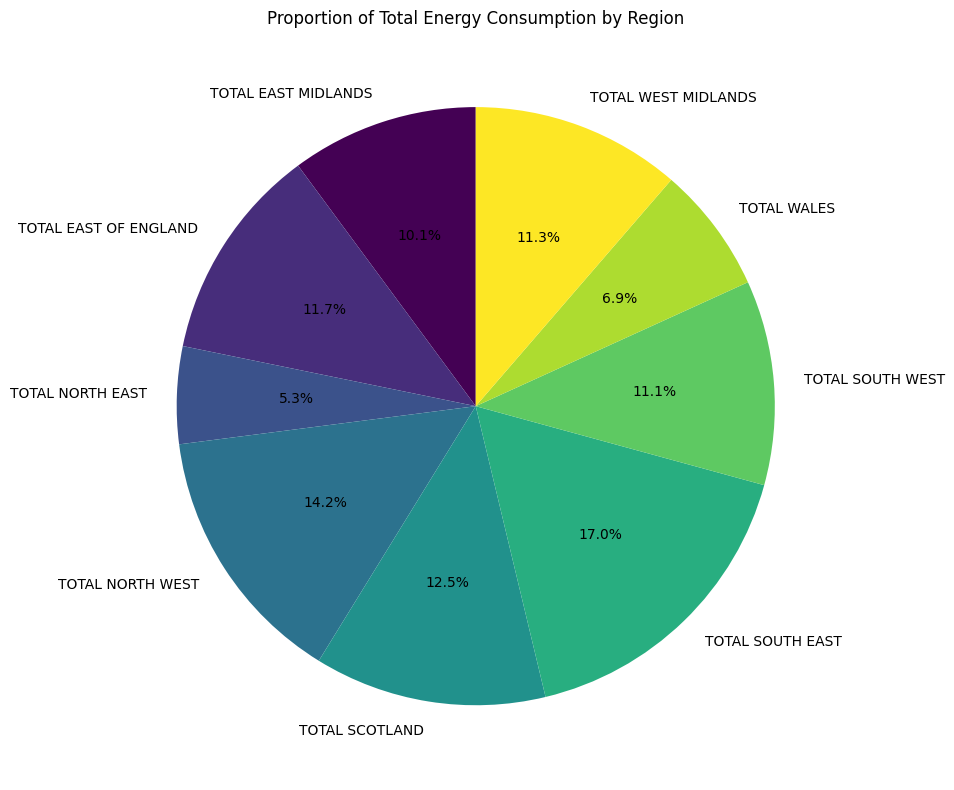

In [15]:
# Pie Chart: Proportion of Total Energy Consumption by Region
plt.figure(figsize=(10, 8))
df_total.groupby('Region')['Total_Sales_GWh'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90,  cmap='viridis')
plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

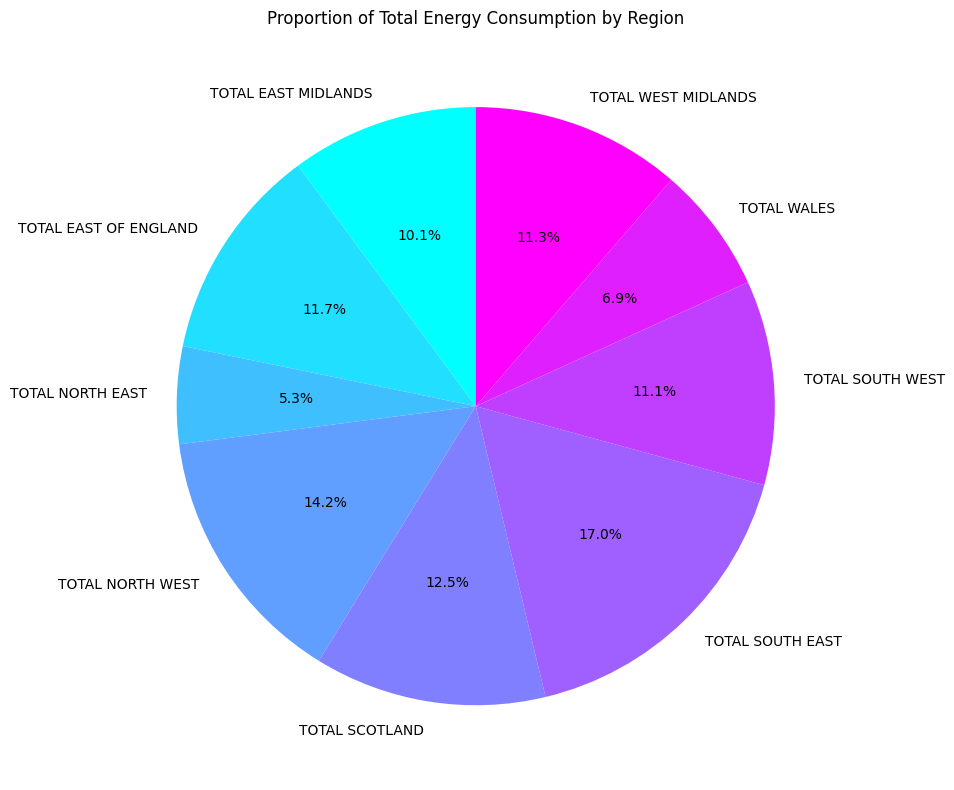

In [16]:
# Adjusted Pie Chart: Proportion of Total Energy Consumption by Region
plt.figure(figsize=(10, 8))
df_total.groupby('Region')['Total_Sales_GWh'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='cool')

# Adjusting the font color for better visibility
plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

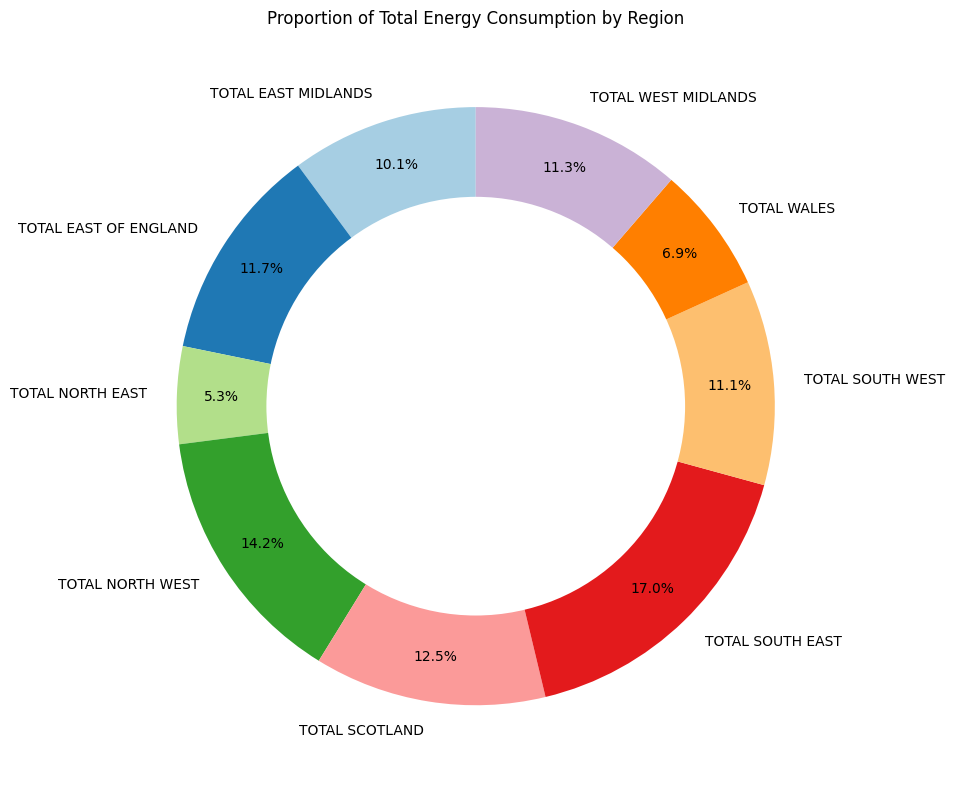

In [17]:
# Professional Pie Chart: Proportion of Total Energy Consumption by Region
plt.figure(figsize=(10, 8))
total_sales = df_total.groupby('Region')['Total_Sales_GWh'].sum()

# Customized colors for better visibility
colors = sns.color_palette("Paired", len(total_sales))

total_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle at the center of the pie chart to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()


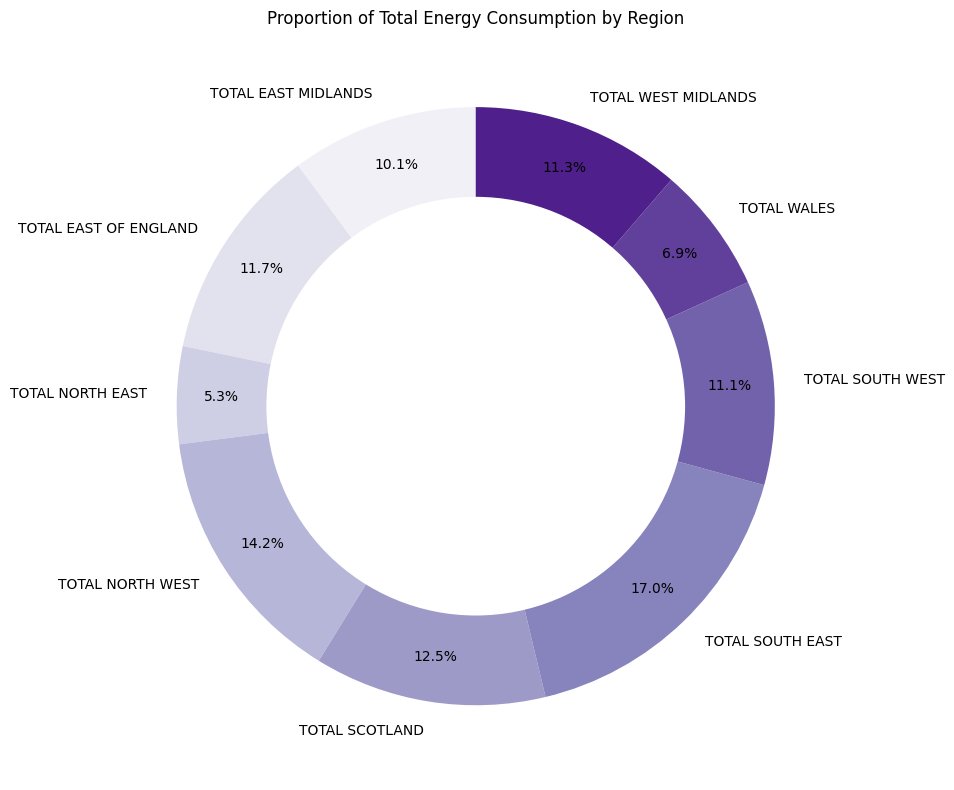

In [18]:
# Adjusted Pie Chart: Aligning with a purple color scheme
plt.figure(figsize=(10, 8))
# Using a purple-based color palette
colors = sns.color_palette("Purples", len(total_sales))

total_sales.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle at the center of the pie chart to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

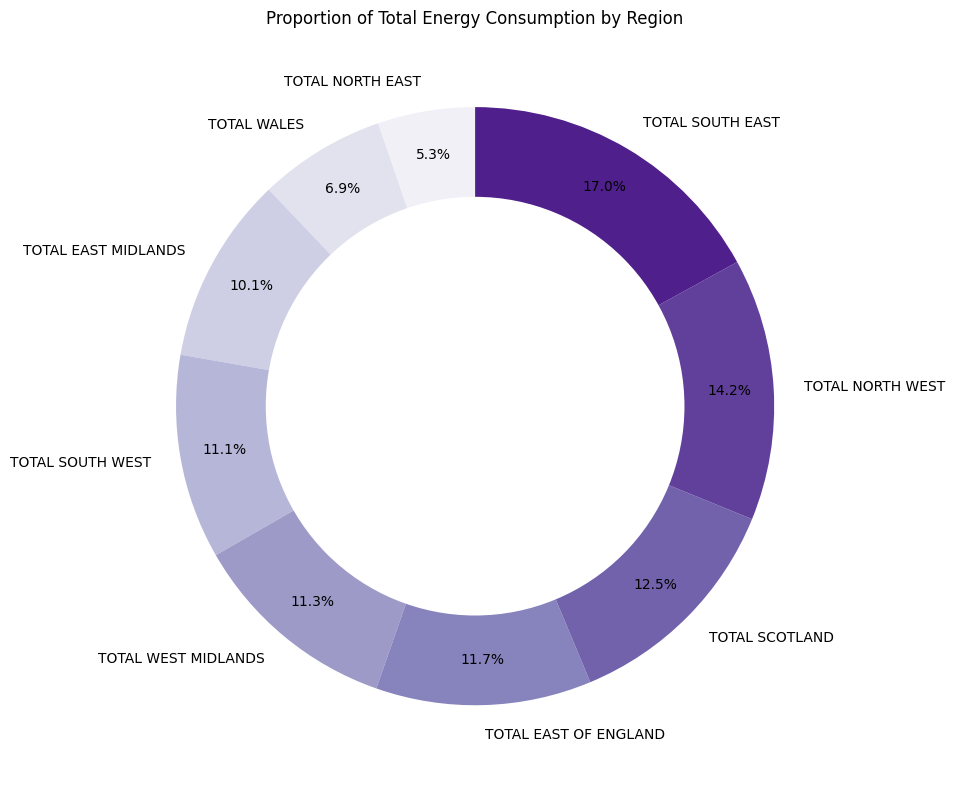

In [46]:

# Sort data to color higher values darker
sorted_data = total_sales.sort_values()

# Generate colors based on sorted values
colors = sns.color_palette("Purples", len(sorted_data))

# Function to set label colors dynamically
def autopct_color(pct):
    value = pct * sum(sorted_data) / 100
    return f"{pct:.1f}%" if value < 10 else f"{pct:.1f}%"  # Adjust according to your threshold

# Adjusted Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(sorted_data, labels=sorted_data.index, autopct=autopct_color, startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()



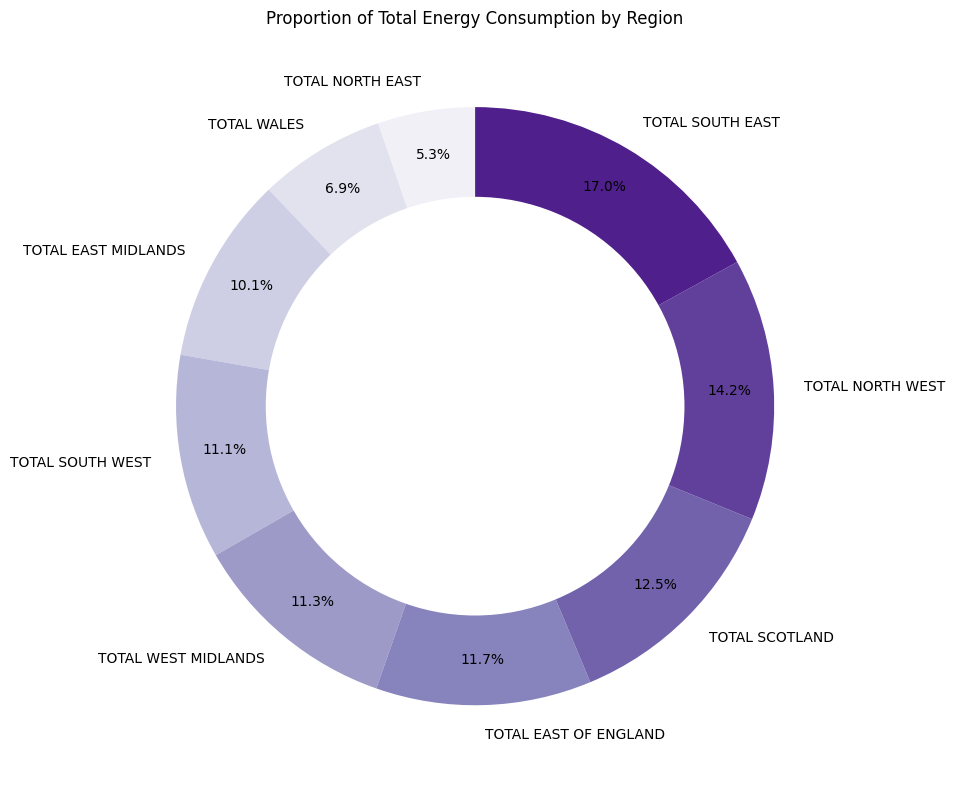

In [48]:
# Sort data to color higher values darker
sorted_data = total_sales.sort_values()

# Generate colors based on sorted values
colors = sns.color_palette("Purples", len(sorted_data))

# Function to set label colors dynamically
def autopct_color(pct):
    absolute = pct / 100. * sorted_data.sum()
    if absolute == sorted_data.max():
        return f"{pct:.1f}%"  # Make it white for the largest section
    else:
        return f"{pct:.1f}%"  # Else default to black

# Adjusted Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(sorted_data, labels=sorted_data.index, autopct=autopct_color, startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

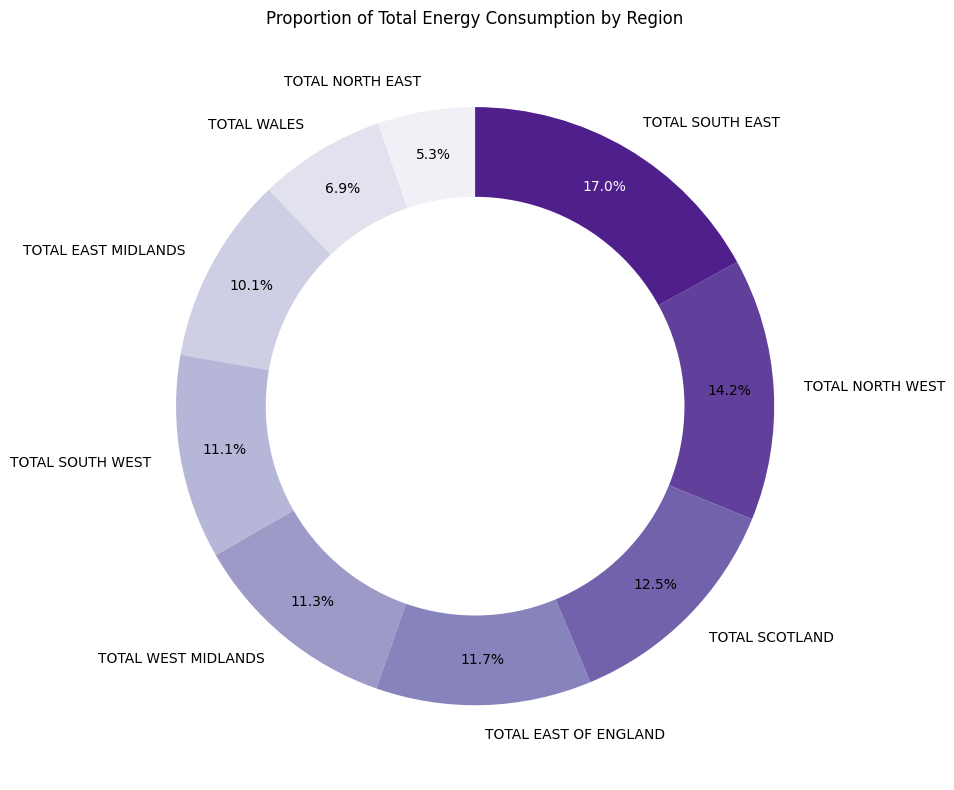

In [49]:

# Sort data to color higher values darker
sorted_data = total_sales.sort_values()

# Generate colors based on sorted values
colors = sns.color_palette("Purples", len(sorted_data))

# Function to generate labels
def autopct_format(pct):
    return f'{pct:.1f}%'

# Adjusted Pie Chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sorted_data, labels=sorted_data.index, autopct=autopct_format,
                                   startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Make the text white for the largest section
max_index = sorted_data.idxmax()
for text, autotext in zip(texts, autotexts):
    if text.get_text() == max_index:
        autotext.set_color('white')

plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()


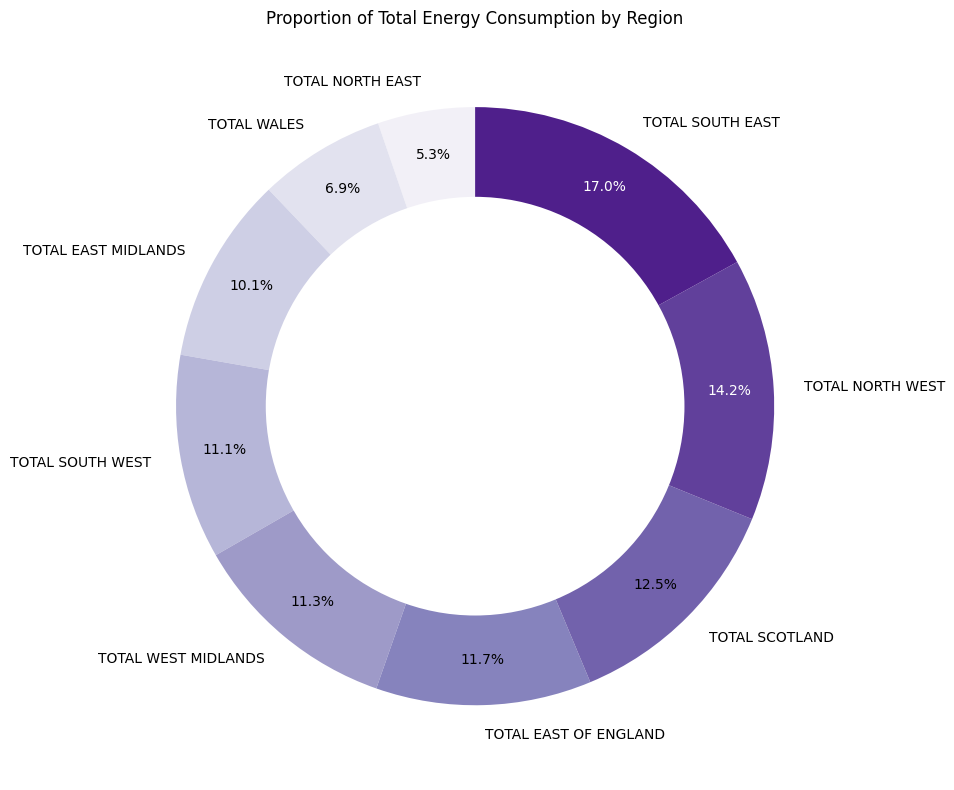

In [50]:
# Sort data to color higher values darker
sorted_data = total_sales.sort_values()

# Generate colors based on sorted values
colors = sns.color_palette("Purples", len(sorted_data))

# Function to generate labels
def autopct_format(pct):
    return f'{pct:.1f}%'

# Adjusted Pie Chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sorted_data, labels=sorted_data.index, autopct=autopct_format,
                                   startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Make the text white for the two largest sections
top_two_indices = sorted_data.nlargest(2).index
for text, autotext in zip(texts, autotexts):
    if text.get_text() in top_two_indices:
        autotext.set_color('white')

plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()


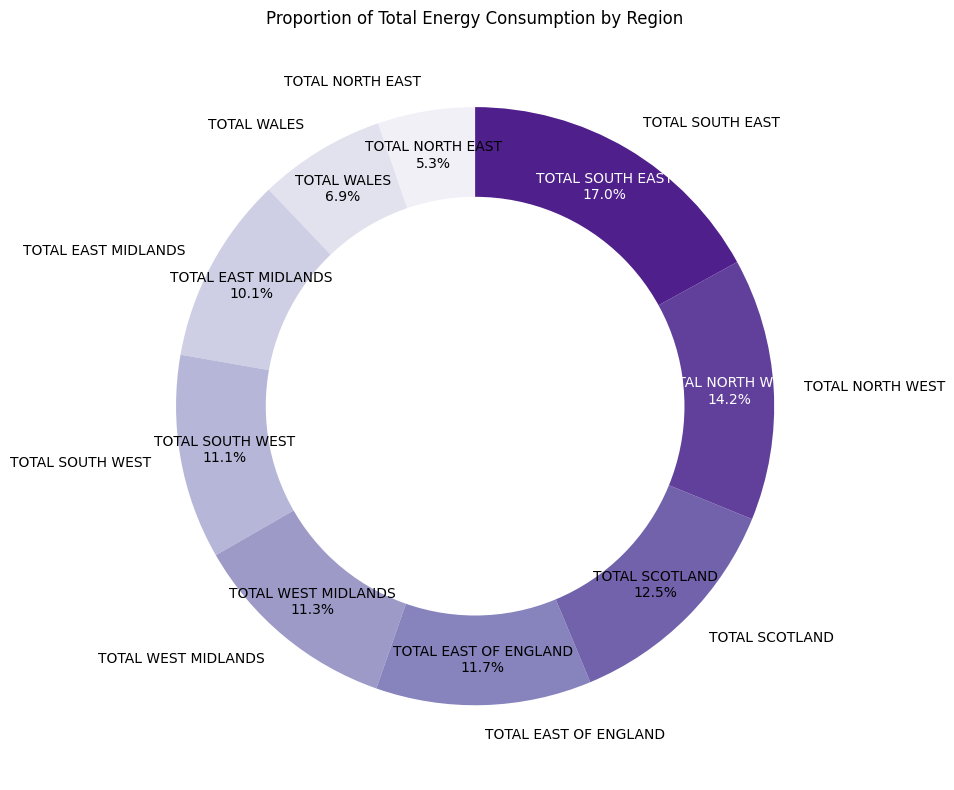

In [62]:
# Sort data to color higher values darker
sorted_data = total_sales.sort_values()

# Generate colors based on sorted values
colors = sns.color_palette("Purples", len(sorted_data))

# Function to generate labels
def autopct_format(pct, total):
    value = int(round(pct*total/100.0))
    index = sorted_data.index[sorted_data == value][0]
    return f"{index}\n{pct:.1f}%"

# Adjusted Pie Chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sorted_data, labels=sorted_data.index, autopct=lambda pct: autopct_format(pct, sorted_data.sum()),
                                   startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Make the text white for the two largest sections
top_two_indices = sorted_data.nlargest(2).index
for text, autotext in zip(texts, autotexts):
    if text.get_text() in top_two_indices:
        autotext.set_color('white')

plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

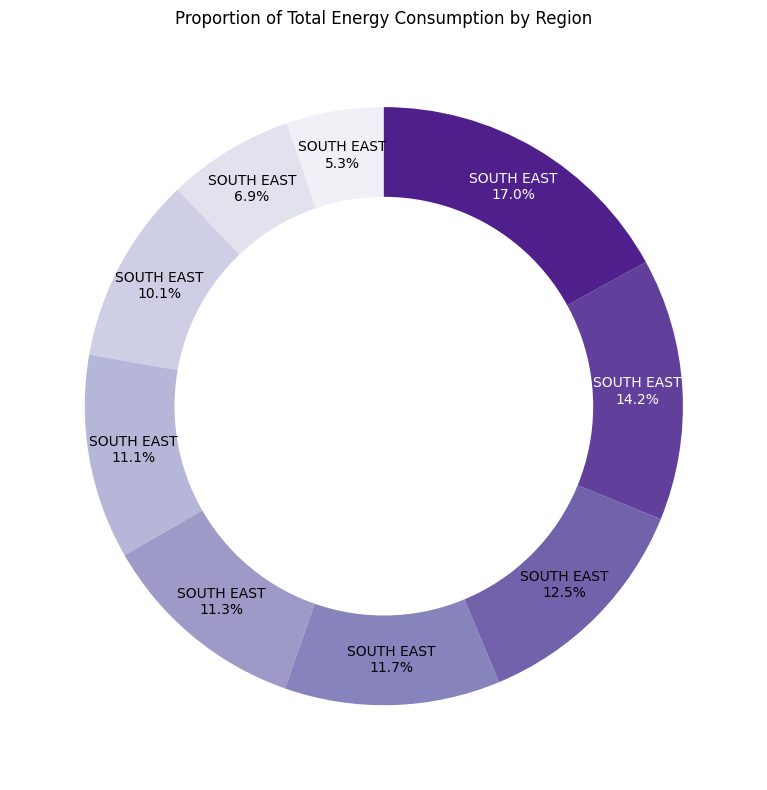

In [67]:


# Sort data to color higher values darker
sorted_data = total_sales.sort_values()

# Generate colors based on sorted values
colors = sns.color_palette("Purples", len(sorted_data))

# Function to generate labels
def autopct_format(pct, total):
    absolute = pct / 100. * total
    index = sorted_data.index[sorted_data == sorted_data.max()][0]
    label = index.replace('TOTAL ', '')
    return f"{label}\n{pct:.1f}%"

# Adjusted Pie Chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sorted_data, autopct=lambda pct: autopct_format(pct, sorted_data.sum()),
                                   startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Make the text white for the two largest sections
top_two_indices = sorted_data.nlargest(2).index
for i, autotext in enumerate(autotexts):
    if sorted_data.index[i] in top_two_indices:
        autotext.set_color('white')

plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()


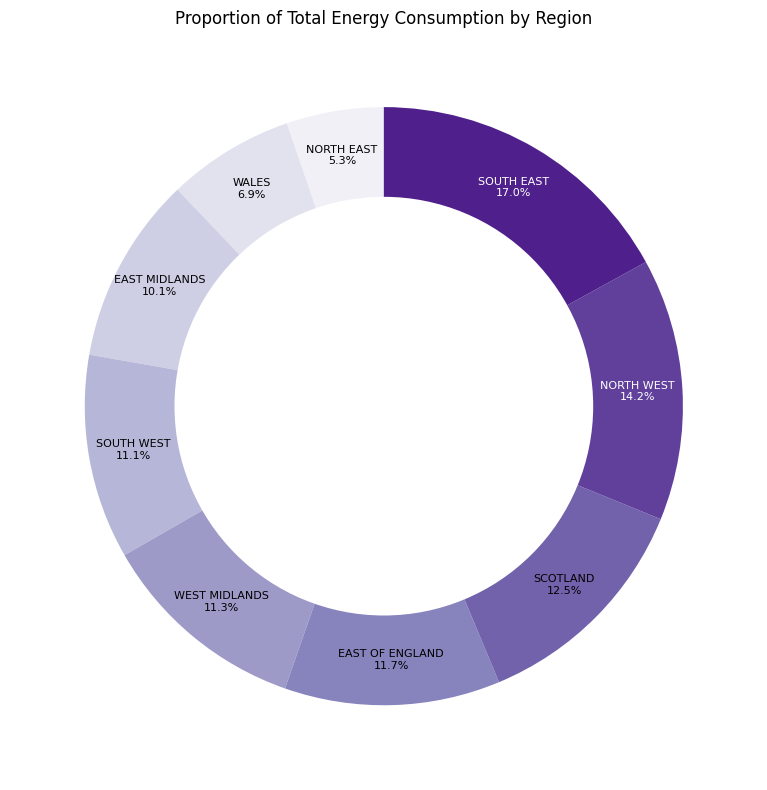

In [71]:
# Sort data to color higher values darker
sorted_data = total_sales.sort_values()

# Generate colors based on sorted values
colors = sns.color_palette("Purples", len(sorted_data))

# Function to generate labels
def autopct_format(pct, total):
    absolute = pct / 100. * total
    index = sorted_data.index[round(absolute) == sorted_data].tolist()[0]  # Match the closest value
    label = index.replace('TOTAL ', '')
    return f"{label}\n{pct:.1f}%"

# Adjusted Pie Chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sorted_data, autopct=lambda pct: autopct_format(pct, sorted_data.sum()),
                                   startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Make the text white for the two largest sections
top_two_indices = sorted_data.nlargest(2).index
for i, autotext in enumerate(autotexts):
    autotext.set_fontsize(autotext.get_fontsize() * 0.8)
    if sorted_data.index[i] in top_two_indices:
        autotext.set_color('white')

plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

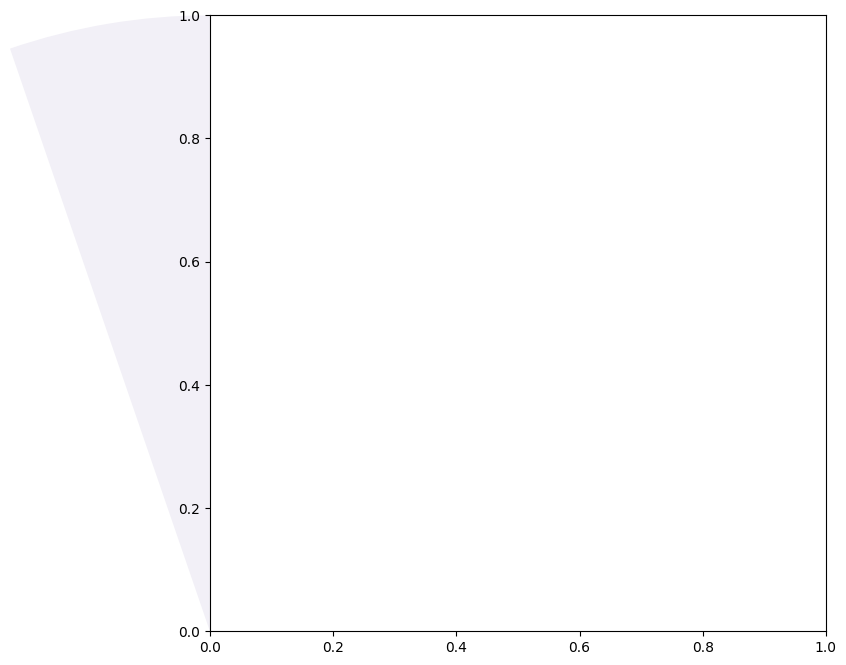

In [66]:
sorted_data = total_sales.sort_values()

# Generate colors based on sorted values
colors = sns.color_palette("Purples", len(sorted_data))

# Function to generate labels
def autopct_format(pct, allvalues):
    value = pct / 100. * allvalues.sum()
    index = sorted_data.index[sorted_data == value].values[0]  # get the index of the value
    clean_label = index.replace('TOTAL ', '')  # Remove the 'TOTAL' prefix
    return f"{clean_label}\n{pct:.1f}%" if pct > 0 else ''  # Show label if significant

# Adjusted Pie Chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(sorted_data, autopct=lambda pct: autopct_format(pct, sorted_data),
                                   startangle=90, colors=colors, pctdistance=0.85)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adjust text colors for the two largest sections
top_two_values = sorted_data.nlargest(2)
for autotext in autotexts:
    value = float(autotext.get_text().split('\n')[-1].replace('%', ''))
    if value in top_two_values.values:
        autotext.set_color('white')

plt.title('Proportion of Total Energy Consumption by Region')
plt.ylabel('')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

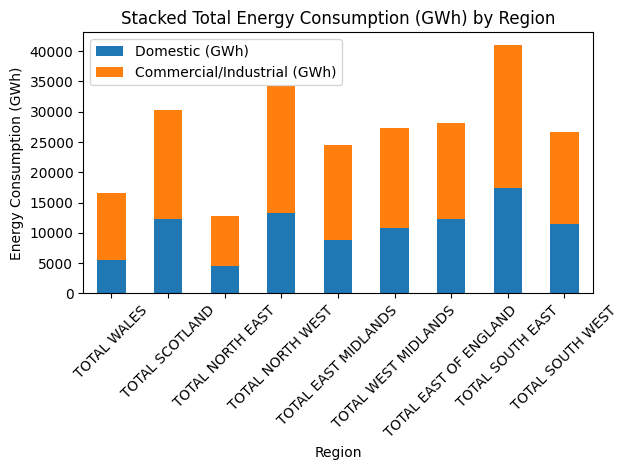

In [19]:
df_total = df_total.rename(columns={
    'Domestic_Sales_GWh': 'Domestic (GWh)',
    'Commercial_Industrial_Sales_GWh': 'Commercial/Industrial (GWh)'
})

# Plot: Stacked Bar Plot without "sales" in the legend
plt.figure(figsize=(12, 8))
df_total.set_index('Region')[['Domestic (GWh)', 'Commercial/Industrial (GWh)']].plot(kind='bar', stacked=True)
plt.title('Stacked Total Energy Consumption (GWh) by Region')
plt.xlabel('Region')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 3000x2000 with 0 Axes>

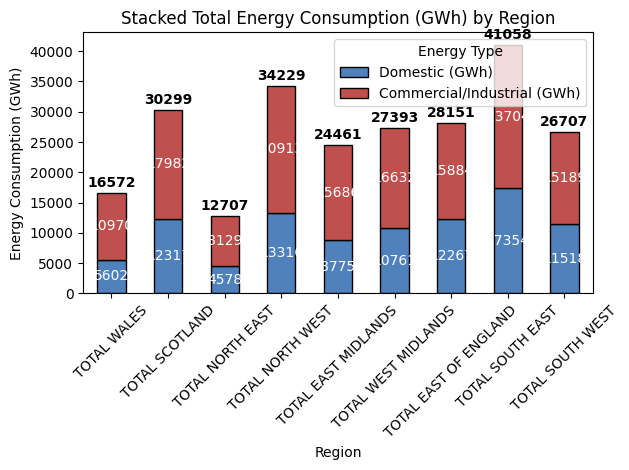

In [72]:
# Enhanced Stacked Bar Plot: Distribution of Energy Consumption by Type
plt.figure(figsize=(30, 20))
df_total.set_index('Region')[['Domestic (GWh)', 'Commercial/Industrial (GWh)']].plot(
    kind='bar', stacked=True, color=['#4f81bd', '#c0504d'], edgecolor='black')

# Add data labels
for i, region in enumerate(df_total['Region']):
    domestic_val = df_total['Domestic (GWh)'].iloc[i]
    commercial_val = df_total['Commercial/Industrial (GWh)'].iloc[i]
    total_val = domestic_val + commercial_val
    plt.text(i, domestic_val / 2, f'{domestic_val:.0f}', ha='center', va='center', color='white')
    plt.text(i, domestic_val + commercial_val / 2, f'{commercial_val:.0f}', ha='center', va='center', color='white')
    plt.text(i, total_val + 500, f'{total_val:.0f}', ha='center', va='bottom', color='black', weight='bold')

plt.title('Stacked Total Energy Consumption (GWh) by Region')
plt.xlabel('Region')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks(rotation=45)
plt.legend(title='Energy Type')
plt.tight_layout()
plt.show()


<Figure size 3000x2000 with 0 Axes>

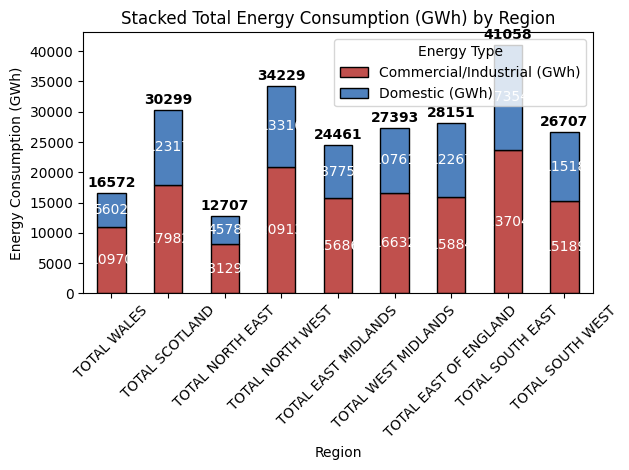

In [73]:
# Enhanced Stacked Bar Plot: Distribution of Energy Consumption by Type
plt.figure(figsize=(30, 20))
df_total.set_index('Region')[['Commercial/Industrial (GWh)', 'Domestic (GWh)']].plot(
    kind='bar', stacked=True, color=['#c0504d', '#4f81bd'], edgecolor='black')

# Add data labels
for i, region in enumerate(df_total['Region']):
    commercial_val = df_total['Commercial/Industrial (GWh)'].iloc[i]
    domestic_val = df_total['Domestic (GWh)'].iloc[i]
    total_val = domestic_val + commercial_val
    plt.text(i, commercial_val / 2, f'{commercial_val:.0f}', ha='center', va='center', color='white')
    plt.text(i, commercial_val + domestic_val / 2, f'{domestic_val:.0f}', ha='center', va='center', color='white')
    plt.text(i, total_val + 500, f'{total_val:.0f}', ha='center', va='bottom', color='black', weight='bold')

plt.title('Stacked Total Energy Consumption (GWh) by Region')
plt.xlabel('Region')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks(rotation=45)
plt.legend(title='Energy Type')
plt.tight_layout()
plt.show()

ValueError: 'upper_right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

<Figure size 2800x1100 with 0 Axes>

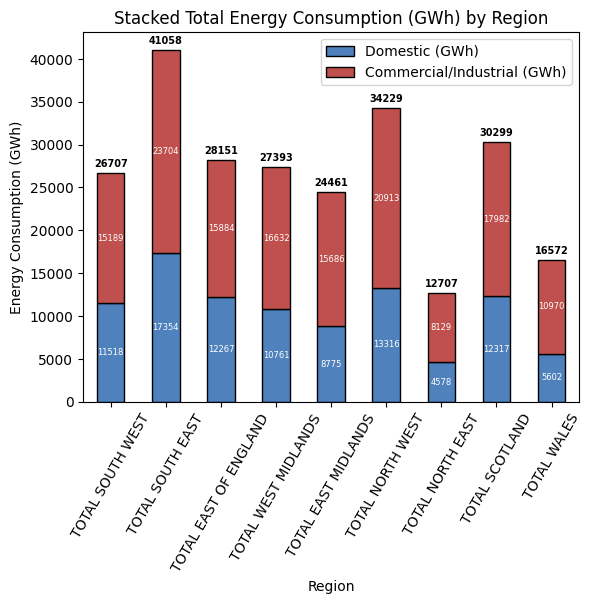

In [87]:
# Reverse the order of the regions in the DataFrame
df_total_reversed = df_total.iloc[::-1]

# Enhanced Stacked Bar Plot: Distribution of Energy Consumption by Type
plt.figure(figsize=(28, 11))
df_total_reversed.set_index('Region')[['Domestic (GWh)', 'Commercial/Industrial (GWh)']].plot(
    kind='bar', stacked=True, color=['#4f81bd', '#c0504d'], edgecolor='black')

# Add data labels
for i, region in enumerate(df_total_reversed['Region']):
    domestic_val = df_total_reversed['Domestic (GWh)'].iloc[i]
    commercial_val = df_total_reversed['Commercial/Industrial (GWh)'].iloc[i]
    total_val = domestic_val + commercial_val
    plt.text(i, domestic_val / 2, f'{domestic_val:.0f}', ha='center', va='center', color='white',fontsize = 6)
    plt.text(i, domestic_val + commercial_val / 2, f'{commercial_val:.0f}', ha='center', va='center', color='white',fontsize =6)
    plt.text(i, total_val + 500, f'{total_val:.0f}', ha='center', va='bottom', color='black', weight='bold', fontsize = 7)

plt.title('Stacked Total Energy Consumption (GWh) by Region')
plt.xlabel('Region')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks(rotation=60)
plt.legend(title='Energy Type', loc = 'upper_right')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

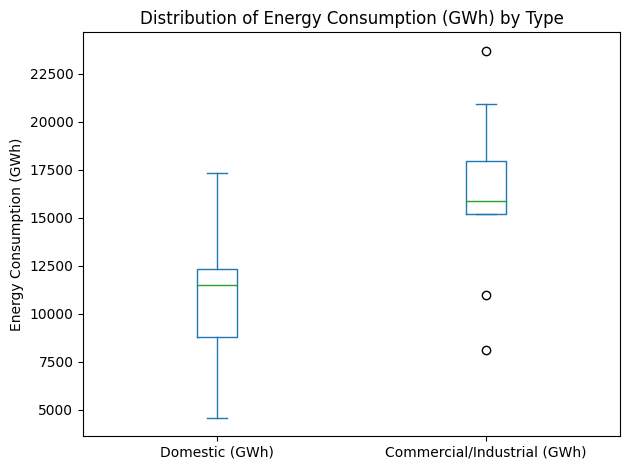

In [21]:
~# Box Plot: Distribution of Domestic and Commercial/Industrial Energy Consumption
plt.figure(figsize=(12, 8))
df_total[['Domestic (GWh)', 'Commercial/Industrial (GWh)']].plot(kind='box')
plt.title('Distribution of Energy Consumption (GWh) by Type')
plt.ylabel('Energy Consumption (GWh)')
plt.tight_layout()
plt.show()

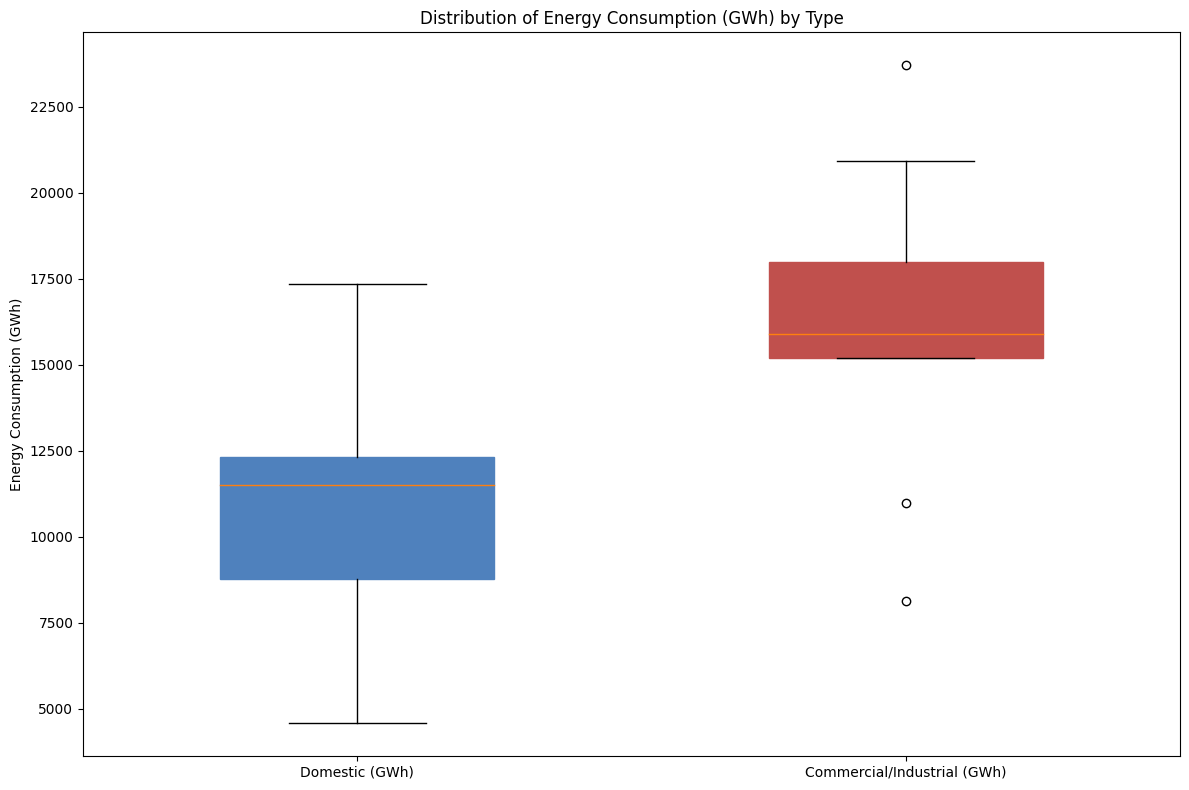

In [22]:
# Create a box plot with specific outline colors for domestic and commercial/industrial consumption
plt.figure(figsize=(12, 8))

# Plotting domestic consumption
bp = plt.boxplot(df_total['Domestic (GWh)'], positions=[1], patch_artist=True, widths=0.5)
for box in bp['boxes']:
    box.set(color='#4f81bd')  # Blue outline

# Plotting commercial/industrial consumption
bp = plt.boxplot(df_total['Commercial/Industrial (GWh)'], positions=[2], patch_artist=True, widths=0.5)
for box in bp['boxes']:
    box.set(color='#c0504d')  # Red outline

plt.title('Distribution of Energy Consumption (GWh) by Type')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks([1, 2], ['Domestic (GWh)', 'Commercial/Industrial (GWh)'])
plt.tight_layout()
plt.show()

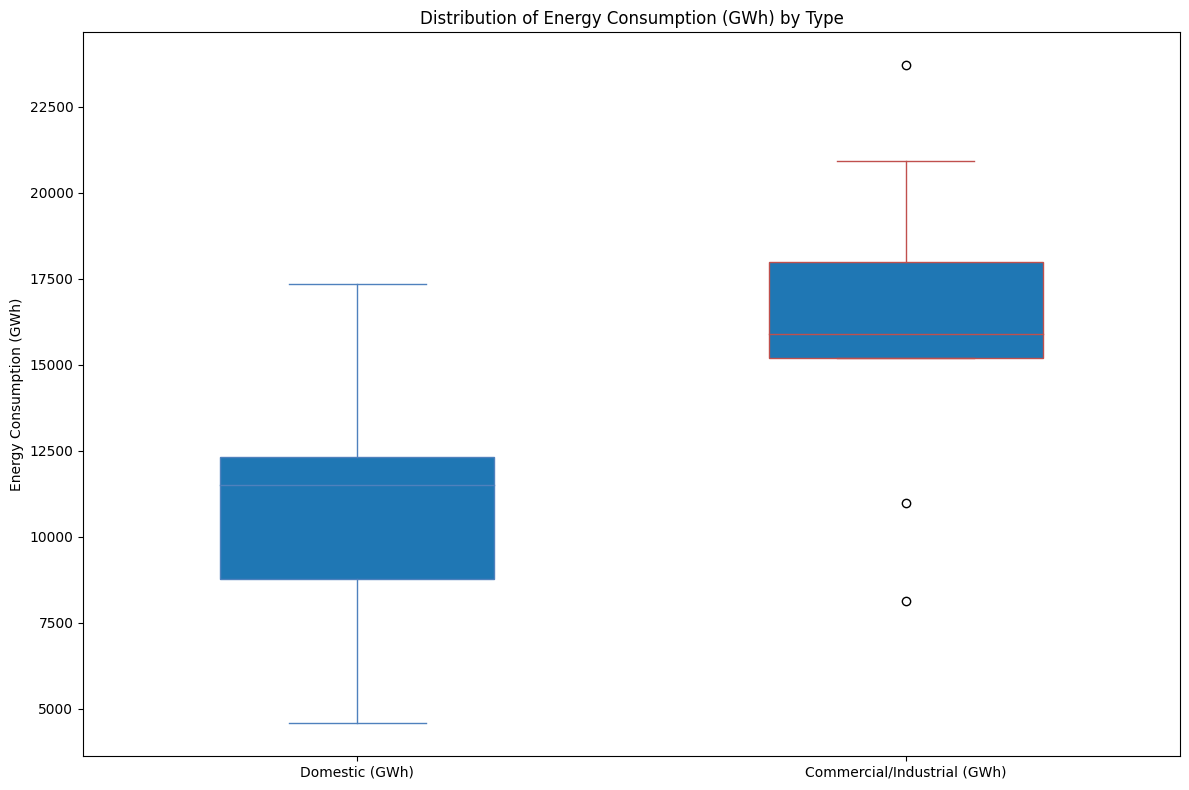

In [23]:
# Create a box plot with specific outline colors for domestic and commercial/industrial consumption
plt.figure(figsize=(12, 8))

# Plotting domestic consumption
bp = plt.boxplot(df_total['Domestic (GWh)'], positions=[1], patch_artist=True, widths=0.5)
for box in bp['boxes']:
    box.set(edgecolor='#4f81bd')  # Blue outline
for element in ['whiskers', 'caps', 'medians']:
    plt.setp(bp[element], color='#4f81bd')

# Plotting commercial/industrial consumption
bp = plt.boxplot(df_total['Commercial/Industrial (GWh)'], positions=[2], patch_artist=True, widths=0.5)
for box in bp['boxes']:
    box.set(edgecolor='#c0504d')  # Red outline
for element in ['whiskers', 'caps', 'medians']:
    plt.setp(bp[element], color='#c0504d')

plt.title('Distribution of Energy Consumption (GWh) by Type')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks([1, 2], ['Domestic (GWh)', 'Commercial/Industrial (GWh)'])
plt.tight_layout()
plt.show()


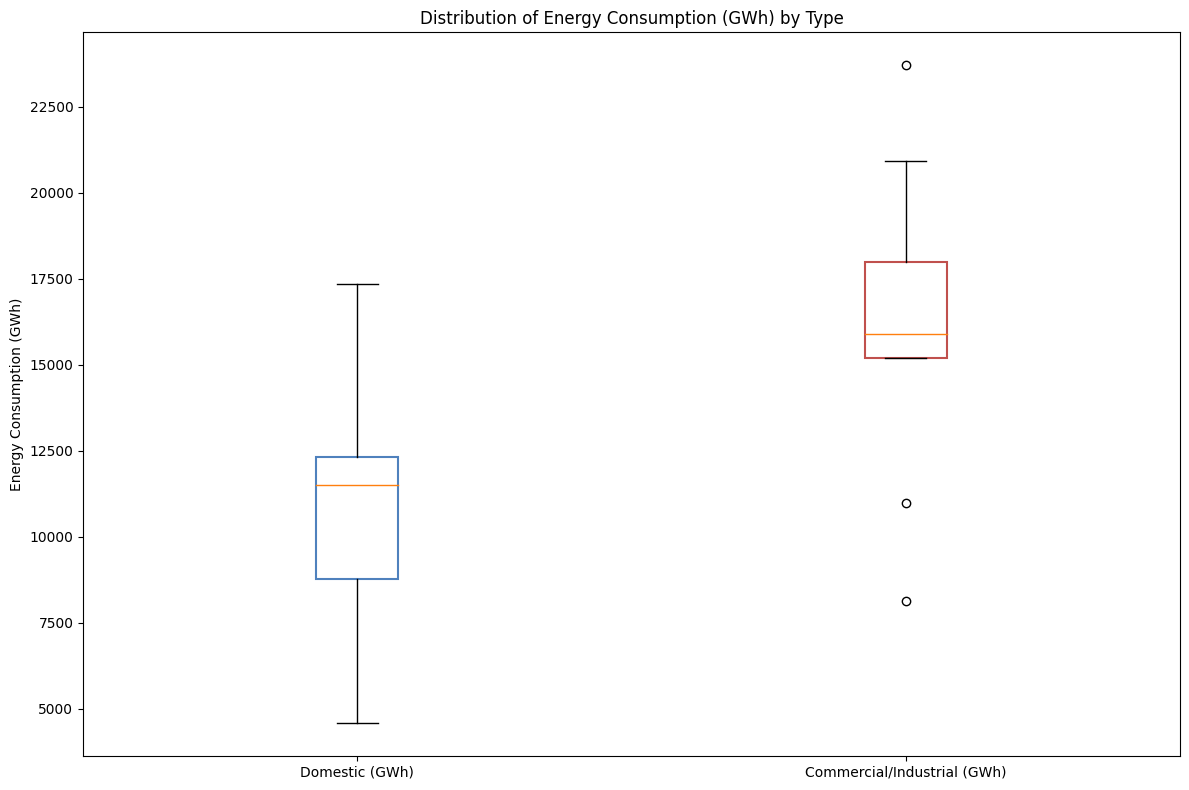

In [24]:
# Create a box plot without any fill colors
plt.figure(figsize=(12, 8))

# Plot the box plot
bp = plt.boxplot([df_total['Domestic (GWh)'], df_total['Commercial/Industrial (GWh)']],
                 patch_artist=True)

# Set outline colors and remove fill
colors = ['#4f81bd', '#c0504d']
for i, box in enumerate(bp['boxes']):
    box.set(linewidth=1.5, edgecolor=colors[i], facecolor='none')

plt.title('Distribution of Energy Consumption (GWh) by Type')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks([1, 2], ['Domestic (GWh)', 'Commercial/Industrial (GWh)'])
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

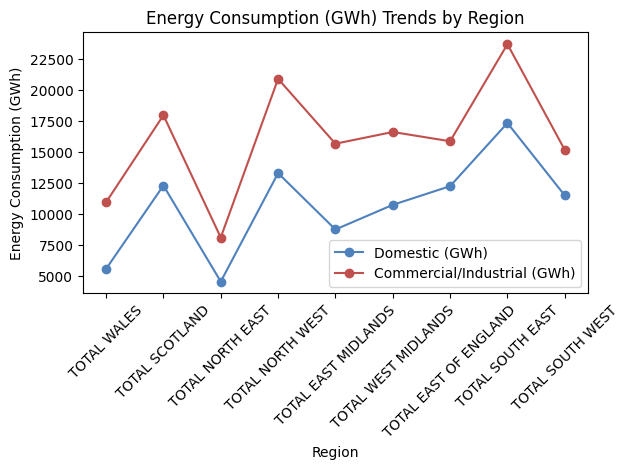

In [25]:
# Line Plot: Total Energy Consumption trends by Region
plt.figure(figsize=(12, 8))
df_total.set_index('Region')[['Domestic (GWh)', 'Commercial/Industrial (GWh)']].plot(kind='line', marker='o',color=['#4f81bd', '#c0504d'])
plt.title('Energy Consumption (GWh) Trends by Region')
plt.xlabel('Region')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 23 to 419
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   NUTS4_Code                             9 non-null      object 
 1   Region                                 9 non-null      object 
 2   Domestic (GWh)                         9 non-null      float64
 3   Domestic_MPANs_thousands               9 non-null      float64
 4   Commercial/Industrial (GWh)            9 non-null      float64
 5   Commercial_Industrial_MPANs_thousands  9 non-null      float64
 6   Total_Sales_GWh                        9 non-null      float64
 7   Total_MPANs_thousands                  9 non-null      float64
dtypes: float64(6), object(2)
memory usage: 648.0+ bytes


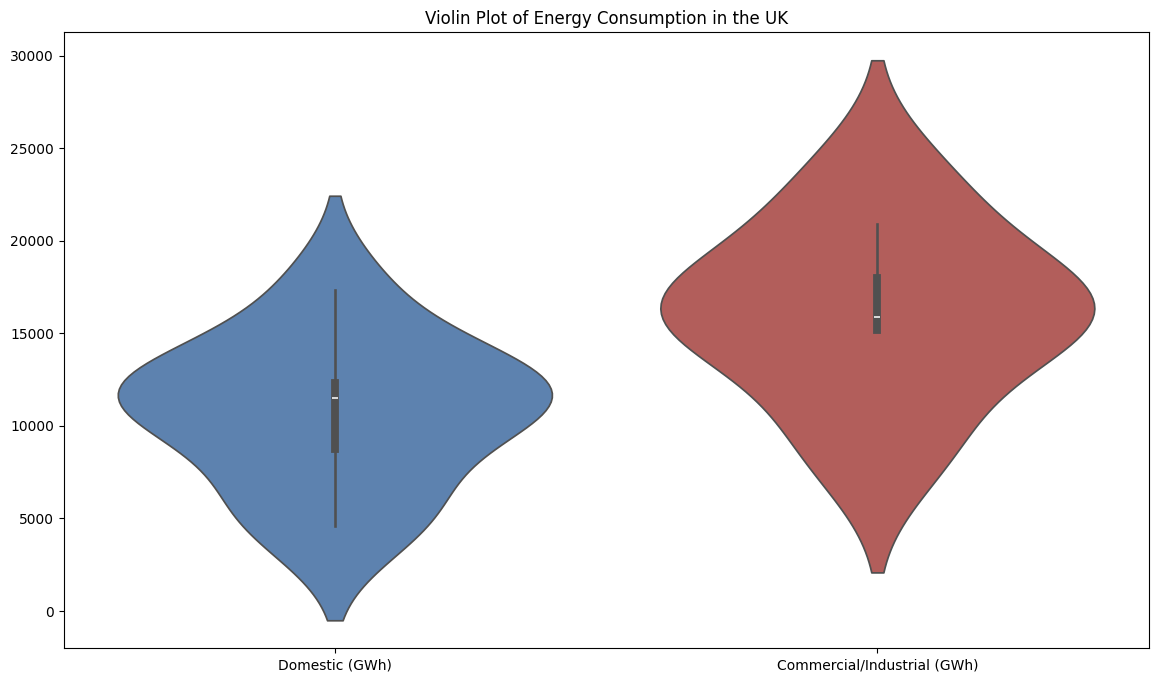

In [27]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_total[['Domestic (GWh)', 'Commercial/Industrial (GWh)']], palette={'Domestic (GWh)': '#4f81bd', 'Commercial/Industrial (GWh)': '#c0504d'})
plt.title('Violin Plot of Energy Consumption in the UK')
plt.show()

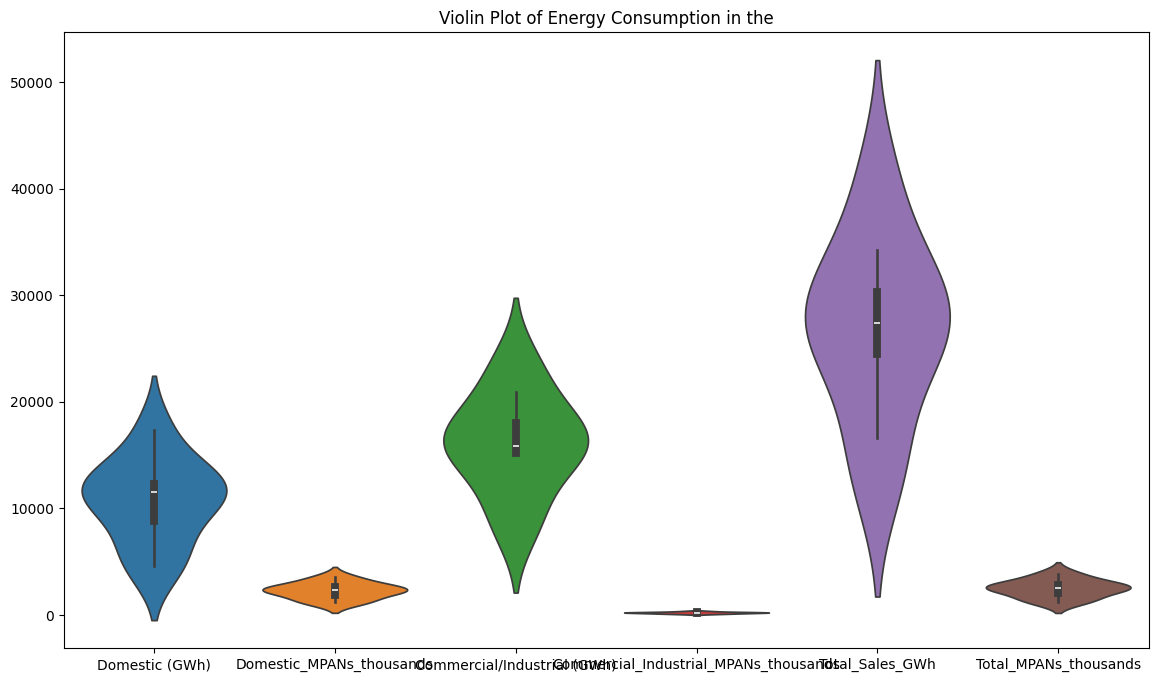

In [28]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_total)
plt.title('Violin Plot of Energy Consumption in the')
plt.show()

<Figure size 1000x600 with 0 Axes>

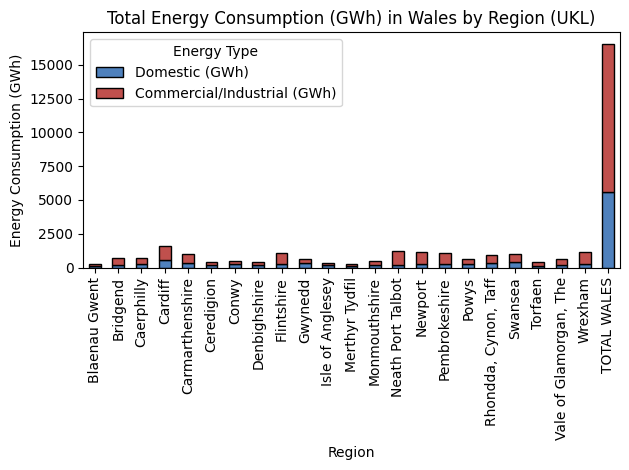

In [29]:
df_wales_ukl_original = df[df['NUTS4_Code'].str.startswith('UKL')]
df_wales_ukl_original = df_wales_ukl_original.rename(columns={
    'Domestic_Sales_GWh': 'Domestic (GWh)',
    'Commercial_Industrial_Sales_GWh': 'Commercial/Industrial (GWh)'
})
# Plot: Stacked Bar Plot for Wales - Domestic vs. Commercial/Industrial
plt.figure(figsize=(10, 6))
df_wales_ukl_original.set_index('Region')[['Domestic (GWh)', 'Commercial/Industrial (GWh)']].plot(kind='bar', stacked=True, color=['#4f81bd', '#c0504d'], edgecolor='black')
plt.title('Total Energy Consumption (GWh) in Wales by Region (UKL)')
plt.xlabel('Region')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks(rotation=90)
plt.legend(title='Energy Type')
plt.tight_layout()
plt.show()

In [30]:
df_wales = df_wales_ukl_original[df_wales_ukl_original['Region'] != 'TOTAL WALES']

ValueError: 'top right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

<Figure size 3000x2000 with 0 Axes>

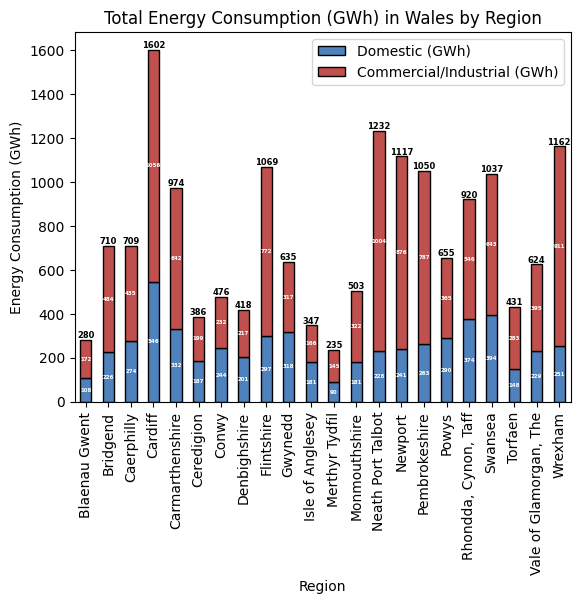

In [61]:
# Plot: Stacked Bar Plot for Wales - Domestic vs. Commercial/Industrial
plt.figure(figsize=(30, 20))
df_wales.set_index('Region')[['Domestic (GWh)', 'Commercial/Industrial (GWh)']].plot(kind='bar', stacked=True, color=['#4f81bd', '#c0504d'], edgecolor='black')

for i, region in enumerate(df_wales['Region']):
    domestic_val = df_wales['Domestic (GWh)'].iloc[i]
    commercial_val = df_wales['Commercial/Industrial (GWh)'].iloc[i]
    total_val = domestic_val + commercial_val
    plt.text(i, domestic_val / 2, f'{domestic_val:.0f}', ha='center', va='center', color='white',weight='bold', fontsize = 4)
    plt.text(i, domestic_val + commercial_val / 2, f'{commercial_val:.0f}', ha='center', va='center', color='white',weight='bold',fontsize = 4)
    plt.text(i, total_val, f'{total_val:.0f}', ha='center', va='bottom', color='black', weight='bold', fontsize=6)

plt.title('Total Energy Consumption (GWh) in Wales by Region')
plt.xlabel('Region')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks(rotation=90)
plt.legend(title='Energy Type',loc='top right')
plt.tight_layout()
plt.show()

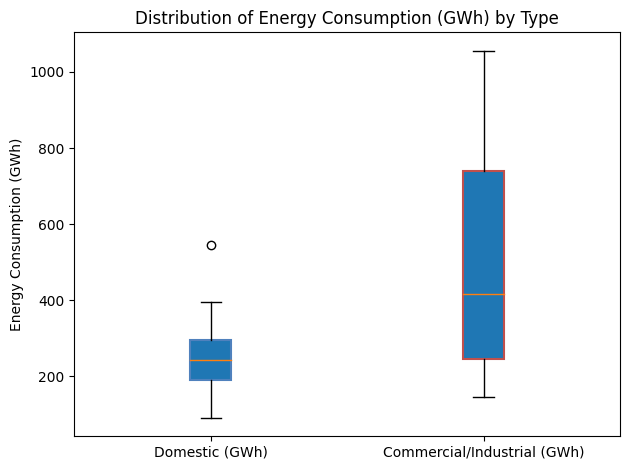

In [32]:

# Plot the box plot with default colors
bp = plt.boxplot([df_wales['Domestic (GWh)'], df_wales['Commercial/Industrial (GWh)']],
                 patch_artist=True)

# Set outline colors manually
colors = ['#4f81bd', '#c0504d']
for i, box in enumerate(bp['boxes']):
    box.set(linewidth=1.5, edgecolor=colors[i])

plt.title('Distribution of Energy Consumption (GWh) by Type')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks([1, 2], ['Domestic (GWh)', 'Commercial/Industrial (GWh)'])
plt.tight_layout()
plt.show()

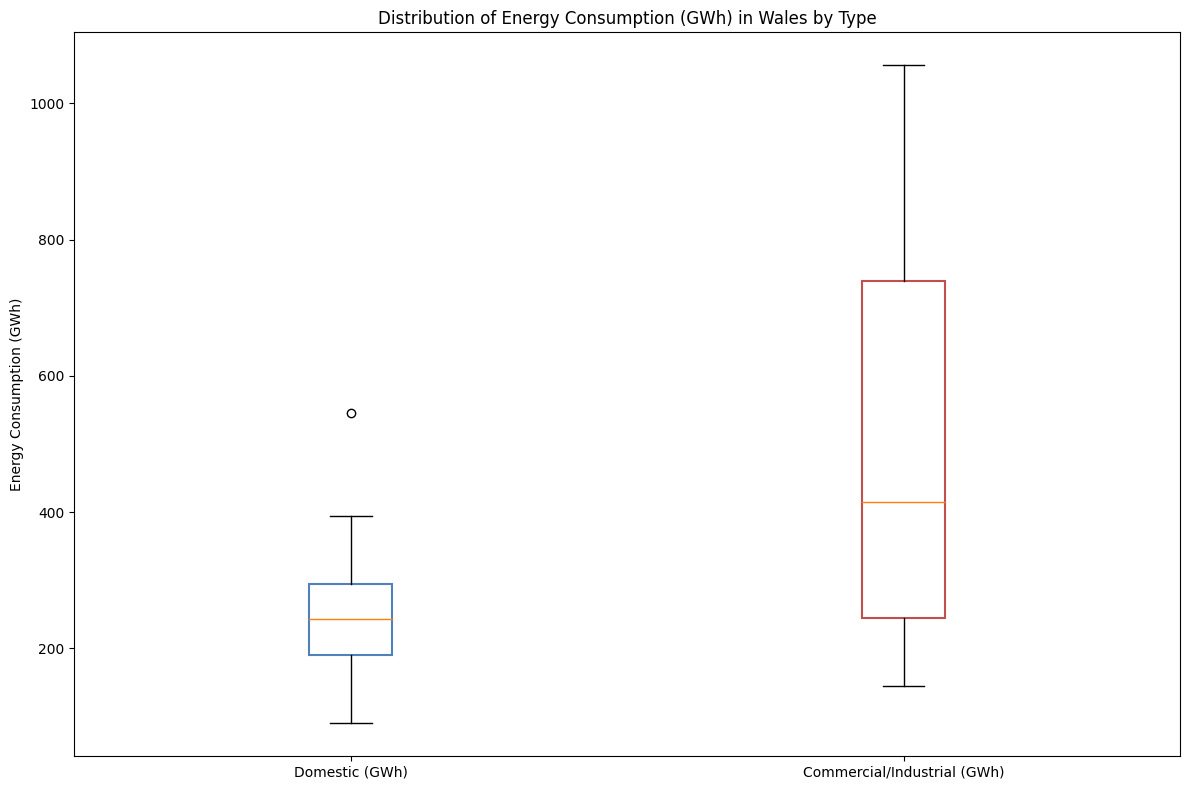

In [33]:
# Create a box plot without any fill colors
plt.figure(figsize=(12, 8))

# Plot the box plot
bp = plt.boxplot([df_wales['Domestic (GWh)'], df_wales['Commercial/Industrial (GWh)']],
                 patch_artist=True)

# Set outline colors and remove fill
colors = ['#4f81bd', '#c0504d']
for i, box in enumerate(bp['boxes']):
    box.set(linewidth=1.5, edgecolor=colors[i], facecolor='none')

plt.title('Distribution of Energy Consumption (GWh) in Wales by Type')
plt.ylabel('Energy Consumption (GWh)')
plt.xticks([1, 2], ['Domestic (GWh)', 'Commercial/Industrial (GWh)'])
plt.tight_layout()
plt.show()

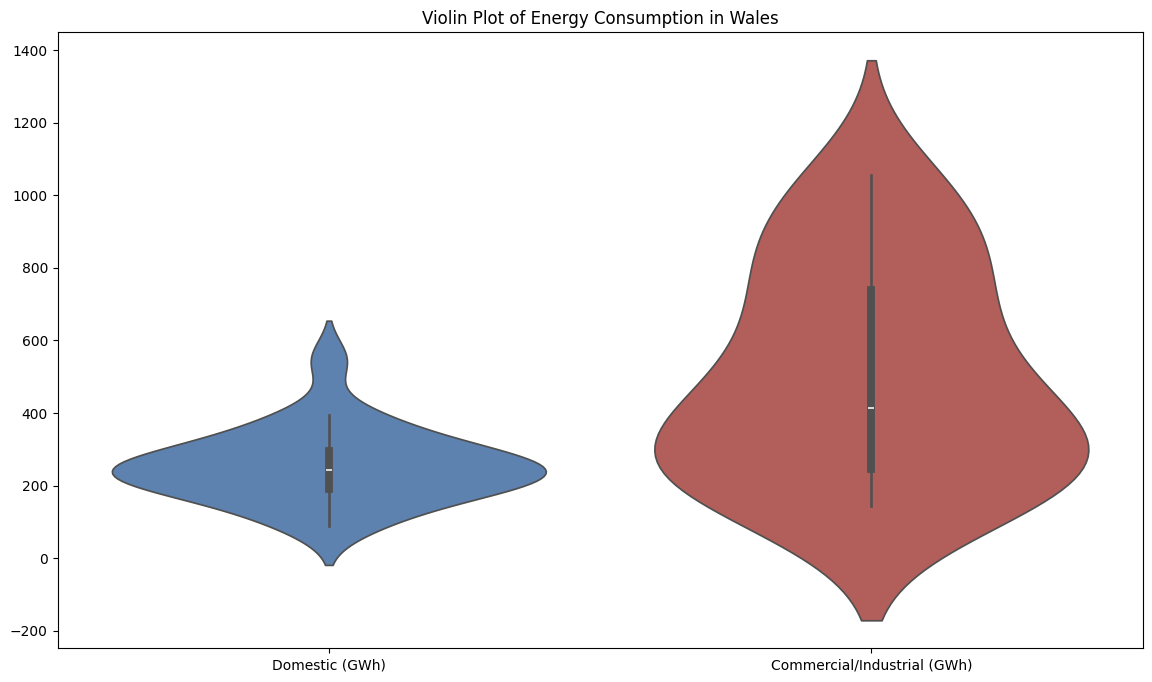

In [34]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=df_wales[['Domestic (GWh)', 'Commercial/Industrial (GWh)']], palette={'Domestic (GWh)': '#4f81bd', 'Commercial/Industrial (GWh)': '#c0504d'})
plt.title('Violin Plot of Energy Consumption in Wales')
plt.show()